# READ DATASET total.csv

{'Média': 33.3121652930229, 'Mediana': 27.0, 'Modo': 26.0, 'std_dev': 25.68600382734764, 'Percentagens': 0.25    23.0
0.50    27.0
0.75    34.0
Name: URLLength, dtype: float64}


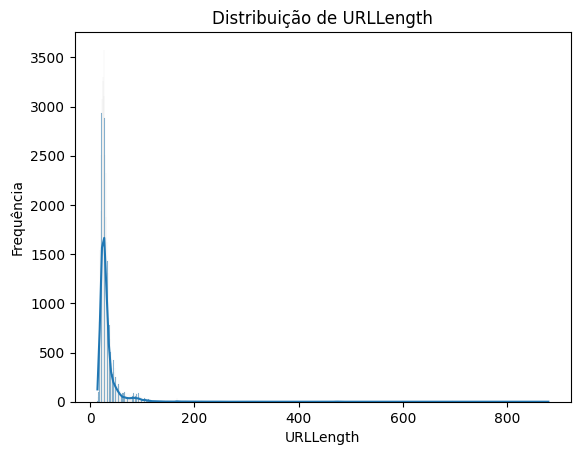

In [70]:
#estatistica
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


data_url = 'Datasets/total.csv'

# Read the dataset using pandas
df = pd.read_csv(data_url, delimiter=';', header=0, encoding='utf-8')


def etatisticas_descritivas(data, column):
    media = data[column].mean()
    mediana = data[column].median()
    modo = data[column].mode()[0] if not data[column].mode().empty else 'N/A'
    std_dev = data[column].std()
    percentagens = data[column].quantile([0.25, 0.5, 0.75])

    return {
        "Média": media,
        "Mediana": mediana,
        "Modo": modo,
        "std_dev": std_dev,
        "Percentagens": percentagens
    }

stats = etatisticas_descritivas(df, 'URLLength')
print(stats)

def distribuicao_variavel(data, column):
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribuição de {column}")
    plt.xlabel(column)
    plt.ylabel("Frequência")
    plt.show()

distribuicao_variavel(df, 'URLLength')

# Remoção de colunas sem relevância e linhas em que o IP não se encontra preenchido

In [71]:
data_url = 'Datasets/total.csv'

# Read the dataset using pandas
df = pd.read_csv(data_url, delimiter=';', header=0, encoding='utf-8', low_memory=False)

# Adicionar uma coluna de ID única
df['ID'] = range(1, len(df) + 1)

# Verificar se a coluna 'IP' está presente
if 'IP' in df.columns:
    # Detectar registros onde o IP está nulo
    ips_nao_encontrados = df[df['IP'].isnull() | (df['IP'] == '')]

    # Contar o número de linhas com IPs não encontrados
    num_ips_nao_encontrados = len(ips_nao_encontrados)
    ids_ips_nao_encontrados = ips_nao_encontrados['ID'].tolist()

    # Exibir a contagem
    print("Número de registos com IPs não encontrados:")
    print(num_ips_nao_encontrados)
    print("Lista de Id's dos registos sem Ip's encontrados")
    print(ids_ips_nao_encontrados)
else:
    print("A coluna 'IP' não está presente no DataFrame.")


Número de registos com IPs não encontrados:
17180
Lista de Id's dos registos sem Ip's encontrados
[22, 28, 30, 32, 33, 35, 41, 42, 45, 46, 51, 53, 55, 58, 60, 61, 74, 78, 81, 83, 88, 92, 101, 102, 105, 109, 110, 115, 121, 122, 126, 127, 139, 145, 148, 150, 152, 159, 162, 166, 168, 186, 194, 199, 212, 213, 217, 233, 234, 237, 243, 244, 246, 247, 248, 250, 257, 263, 267, 271, 276, 278, 285, 287, 288, 292, 296, 299, 300, 307, 308, 312, 313, 315, 316, 319, 320, 330, 334, 335, 337, 346, 352, 353, 357, 361, 363, 366, 369, 371, 374, 376, 377, 378, 379, 382, 388, 389, 395, 401, 402, 403, 413, 415, 416, 421, 422, 424, 425, 428, 432, 434, 443, 444, 445, 450, 453, 456, 459, 461, 463, 467, 470, 475, 478, 480, 481, 484, 485, 487, 493, 494, 495, 498, 499, 507, 512, 514, 516, 522, 523, 526, 529, 533, 535, 538, 542, 559, 561, 566, 570, 575, 576, 581, 583, 593, 601, 606, 608, 618, 622, 623, 629, 630, 639, 643, 644, 646, 653, 655, 675, 682, 687, 692, 695, 707, 708, 710, 724, 736, 738, 741, 746, 749, 750

# Criação de string "noIP" para linhas sem IP 

In [72]:
df.loc[df['ID'].isin(ids_ips_nao_encontrados), 'IP'] = 'noIP'

print(df["IP"].head(25))

0     142.93.145.212
1      134.93.178.47
2      3.160.132.110
3     104.18.124.114
4      45.167.121.53
5      104.22.46.216
6       172.67.68.10
7     152.199.21.175
8     104.211.74.196
9      184.154.38.11
10      167.233.3.76
11     91.239.200.44
12    35.188.144.184
13       52.23.51.78
14       78.128.79.7
15    173.255.253.22
16     185.53.178.54
17      68.183.64.12
18      23.227.38.74
19     103.86.177.98
20      141.8.197.42
21              noIP
22      172.67.72.98
23     185.103.37.75
24    45.223.167.195
Name: IP, dtype: object


# Verificar se há linhas duplicadas

In [73]:
duplicatas = df[df.duplicated()]

# Contar o número de linhas duplicadas
num_duplicatas = len(duplicatas)

# Exibir a contagem
print("Número de linhas duplicadas:")
print(num_duplicatas)

# Exibir as linhas duplicadas
if num_duplicatas > 0:
    print("Linhas duplicadas:")
    print(duplicatas)
else:
    print("Não há linhas duplicadas no DataFrame.")

Número de linhas duplicadas:
0
Não há linhas duplicadas no DataFrame.


# Transformação de variáveis categóricas em valores

In [74]:
label_encoder = LabelEncoder()

# Lista de colunas categóricas
categorical_columns = ['TLD', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'IP', 'DNS', 'Reverse DNS', 'City', 'Region', 'Country', 'Org', 'Timezone', 'Hostname']

# Aplicar o LabelEncoder em cada coluna categórica
for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

# Verificar as primeiras linhas do DataFrame
print(df.head())

                                  URL  URLLength                      Domain  \
0    https://www.southbankmosaics.com       31.0    www.southbankmosaics.com   
1            https://www.uni-mainz.de       23.0            www.uni-mainz.de   
2      https://www.voicefmradio.co.uk       29.0      www.voicefmradio.co.uk   
3         https://www.sfnmjournal.com       26.0         www.sfnmjournal.com   
4  https://www.rewildingargentina.org       33.0  www.rewildingargentina.org   

   DomainLength  IsDomainIP  TLD  URLSimilarityIndex  CharContinuationRate  \
0          24.0         0.0  131               100.0              1.000000   
1          16.0         0.0  148               100.0              0.666667   
2          22.0         0.0  426               100.0              0.866667   
3          19.0         0.0  131               100.0              1.000000   
4          26.0         0.0  330               100.0              1.000000   

   TLDLegitimateProb  URLCharProb  ...  City  Regi

# Remoção de colunas menos importantes

In [75]:
less_important_columns = [
    'URL', 'Title', 'Robots', 'Hostname', 'City', 'Region', 'Country',
    'Postal', 'Latitude', 'Longitude', 'Timezone', 'Org'
]

# Remover colunas menos importantes
df_filtered = df.drop(columns=less_important_columns)

# Verificar as primeiras linhas do DataFrame filtrado
print(df_filtered.head())

   URLLength                      Domain  DomainLength  IsDomainIP  TLD  \
0       31.0    www.southbankmosaics.com          24.0         0.0  131   
1       23.0            www.uni-mainz.de          16.0         0.0  148   
2       29.0      www.voicefmradio.co.uk          22.0         0.0  426   
3       26.0         www.sfnmjournal.com          19.0         0.0  131   
4       33.0  www.rewildingargentina.org          26.0         0.0  330   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  URLCharProb  \
0               100.0              1.000000           0.522907     0.061933   
1               100.0              0.666667           0.032650     0.050207   
2               100.0              0.866667           0.028555     0.064129   
3               100.0              1.000000           0.522907     0.057606   
4               100.0              1.000000           0.079963     0.059441   

   TLDLength  ...  NoOfJS  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef  lab

# Outliers

In [76]:
numeric_columns = [
    'URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 
    'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 
    'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 
    'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 
    'LineOfCode', 'LargestLineLength', 'NoOfPopup', 'NoOfiFrame', 'NoOfURLRedirect', 
    'NoOfSelfRedirect', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 
    'NoOfEmptyRef', 'NoOfExternalRef'
]

# Função para identificar outliers com IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar e exibir outliers para cada coluna numérica
for column in numeric_columns:
    if column in df.columns:
        outliers = find_outliers_iqr(df, column)
        num_outliers = len(outliers)
        print(f"Coluna: {column}")
        print(f"Número de outliers: {num_outliers}")
        if num_outliers > 0:
            print(outliers[['ID', column]])
        print("\n")

Coluna: URLLength
Número de outliers: 4767
          ID  URLLength
31        32       91.0
45        46      140.0
77        78       92.0
83        84       51.0
91        92       64.0
...      ...        ...
52644  52645       74.0
52646  52647      103.0
52651  52652       88.0
52655  52656       88.0
52657  52658       71.0

[4767 rows x 2 columns]


Coluna: DomainLength
Número de outliers: 2933
          ID  DomainLength
83        84          45.0
92        93          47.0
100      101          46.0
104      105          37.0
108      109          39.0
...      ...           ...
52644  52645          59.0
52646  52647          71.0
52655  52656          79.0
52657  52658          48.0
52662  52663          37.0

[2933 rows x 2 columns]


Coluna: URLSimilarityIndex
Número de outliers: 0


Coluna: CharContinuationRate
Número de outliers: 279
          ID  CharContinuationRate
100      101              0.214286
810      811              0.181818
898      899              0.204545
1

# Identificar e Analisar Outliers

In [79]:
import numpy as np
from scipy.stats import zscore

# Lista de colunas numéricas que podem ser relevantes para análise de phishing
numeric_columns = [
    'URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 
    'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 
    'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 
    'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 
    'LineOfCode', 'LargestLineLength', 'NoOfPopup', 'NoOfiFrame', 'NoOfURLRedirect', 
    'NoOfSelfRedirect', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 
    'NoOfEmptyRef', 'NoOfExternalRef'
]

# Função para identificar outliers com z-scores
def find_outliers_zscore(df, column, threshold=3):
    col_data = df[column].dropna()
    z_scores = zscore(col_data)
    abs_z_scores = np.abs(z_scores)
    outlier_indices = col_data.index[abs_z_scores > threshold]
    outliers = df.loc[outlier_indices, ['ID', column]]
    return outliers

# Detectar e exibir outliers para cada coluna numérica usando z-scores
outliers_info = {}
for column in numeric_columns:
    if column in df.columns:
        outliers = find_outliers_zscore(df, column)
        num_outliers = len(outliers)
        outliers_info[column] = num_outliers
        print(f"Coluna: {column}, Número de outliers: {num_outliers}")
        if num_outliers > 0:
            print(outliers)
        print("\n")

# Analisar características dos sites de phishing
phishing_df = df[df['label'] == 1]
legitimate_df = df[df['label'] == 0]

phishing_means = phishing_df[numeric_columns].mean()
legitimate_means = legitimate_df[numeric_columns].mean()

print("\nCaracterísticas dos sites de phishing (médias):")
print(phishing_means)

print("\nCaracterísticas dos sites legítimos (médias):")
print(legitimate_means)


Coluna: URLLength, Número de outliers: 563
          ID  URLLength
45        46      140.0
287      288      119.0
365      366      125.0
521      522      127.0
903      904      126.0
...      ...        ...
52150  52151      385.0
52197  52198      130.0
52313  52314      132.0
52338  52339      301.0
52461  52462      330.0

[563 rows x 2 columns]


Coluna: DomainLength, Número de outliers: 830
          ID  DomainLength
259      260          52.0
351      352          74.0
378      379          74.0
513      514          52.0
600      601          55.0
...      ...           ...
52548  52549          63.0
52570  52571          54.0
52644  52645          59.0
52646  52647          71.0
52655  52656          79.0

[830 rows x 2 columns]


Coluna: URLSimilarityIndex, Número de outliers: 0


Coluna: CharContinuationRate, Número de outliers: 148
          ID  CharContinuationRate
810      811              0.181818
1125    1126              0.181818
1976    1977              0.202899
3

# Análise gráfica

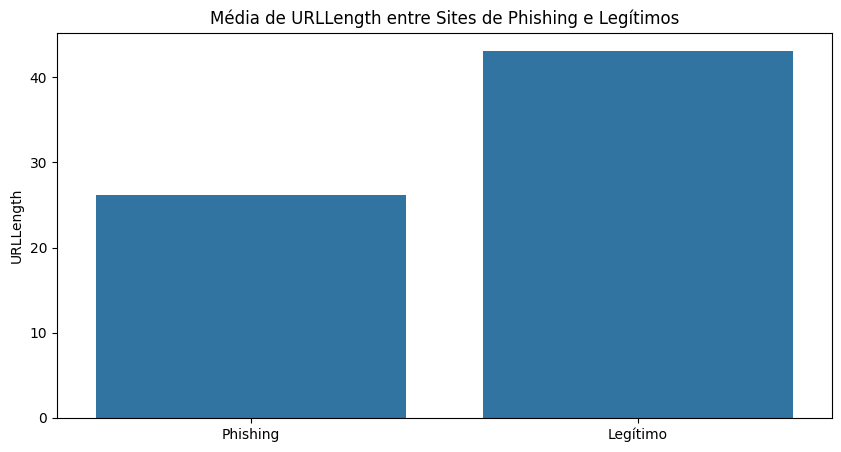

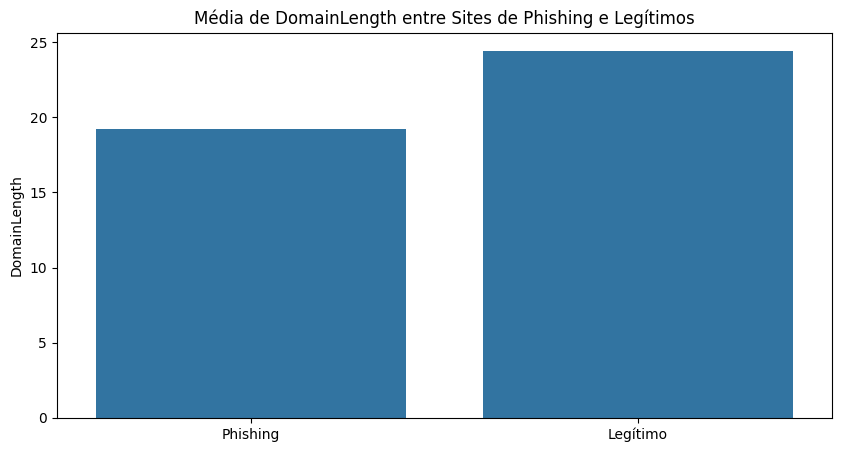

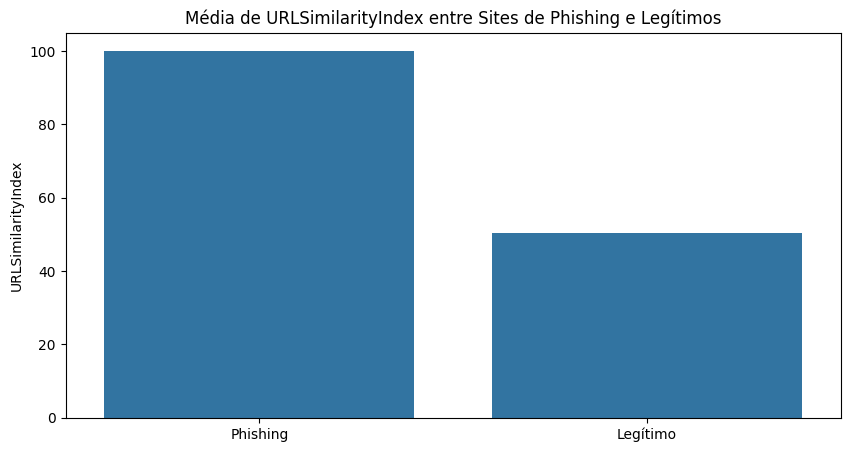

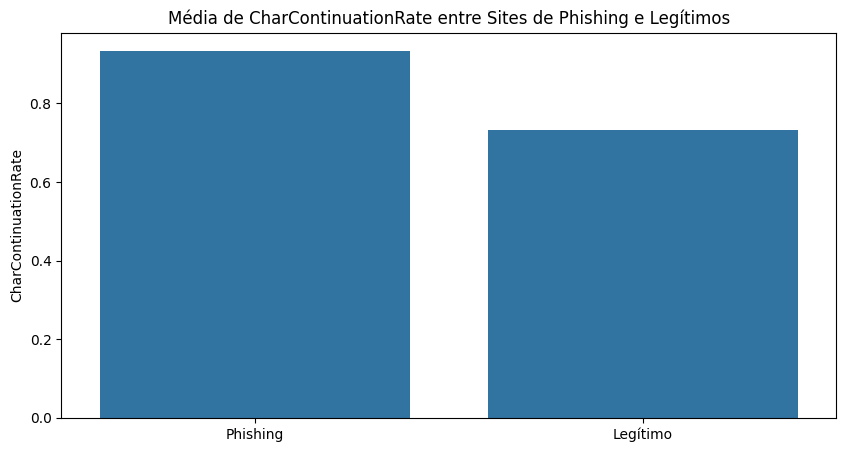

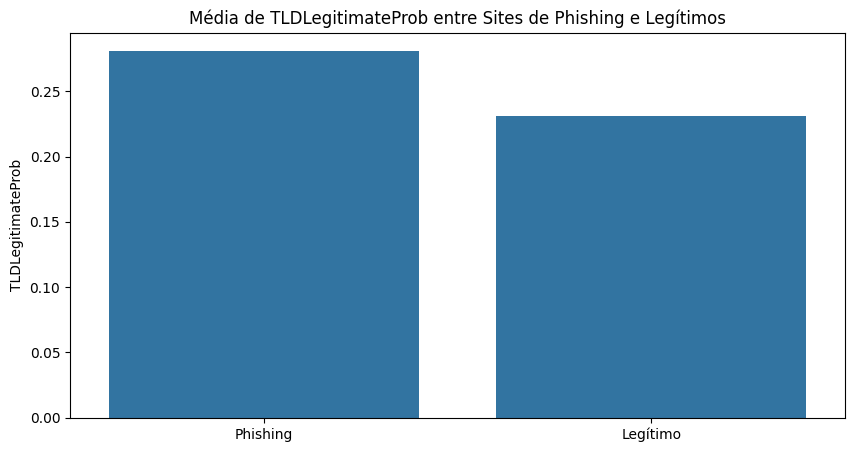

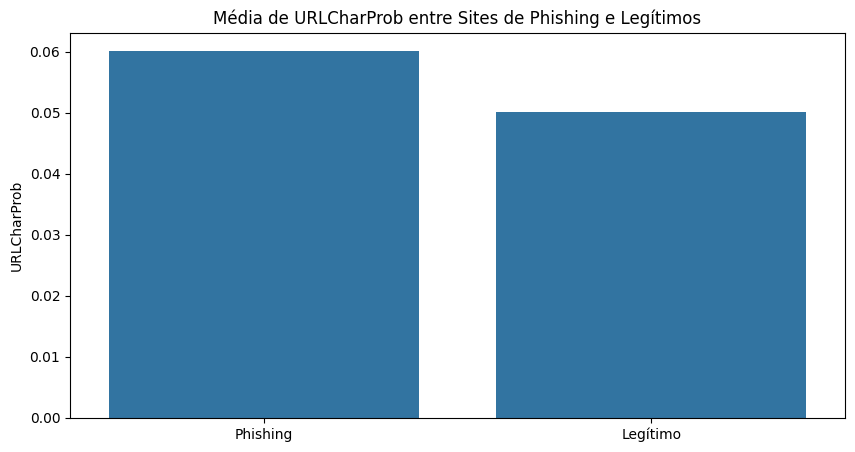

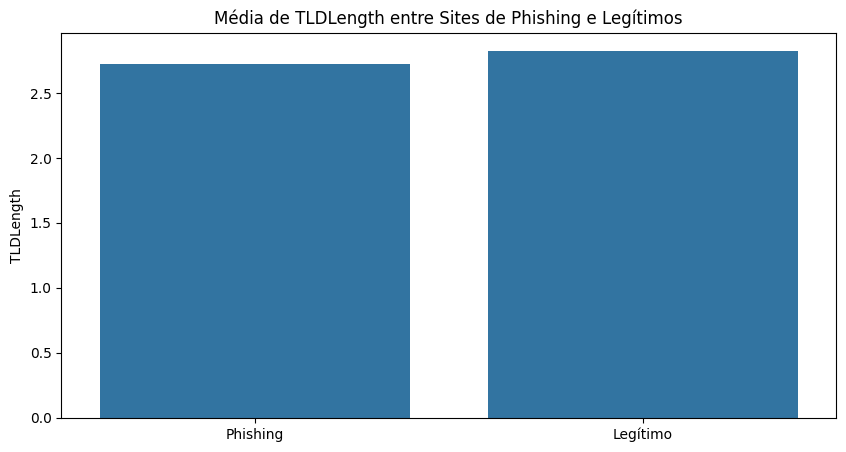

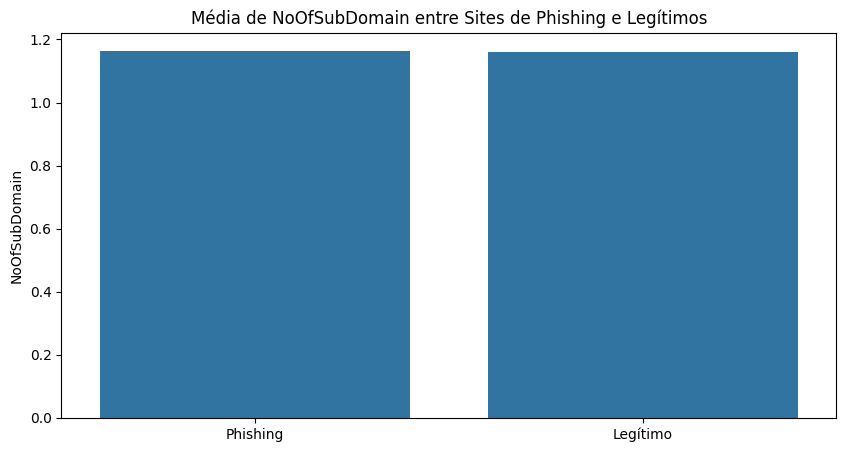

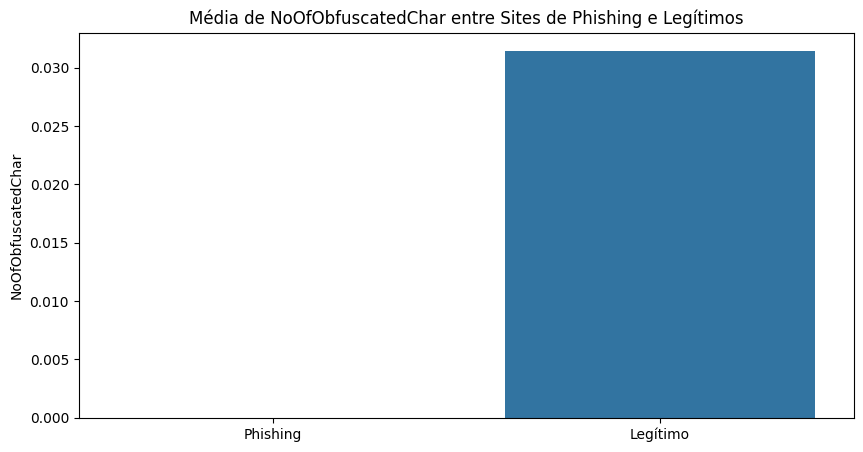

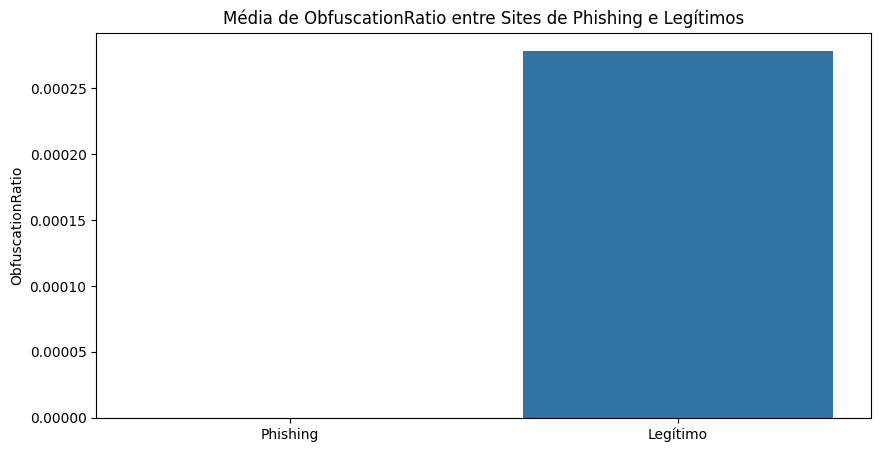

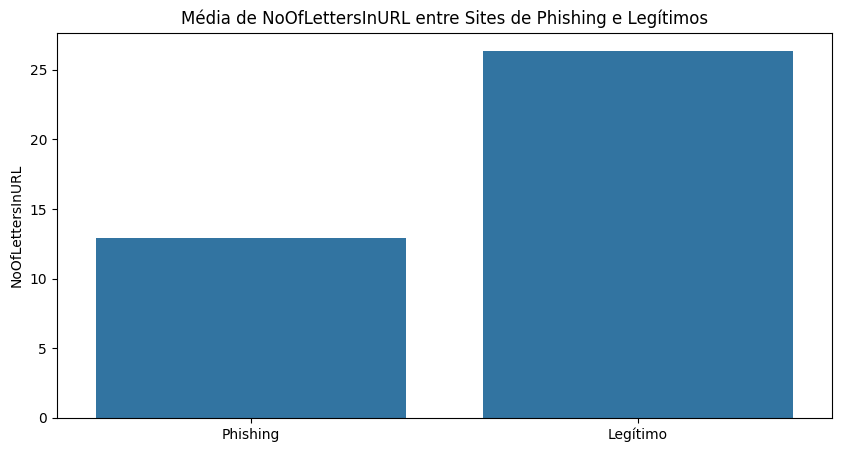

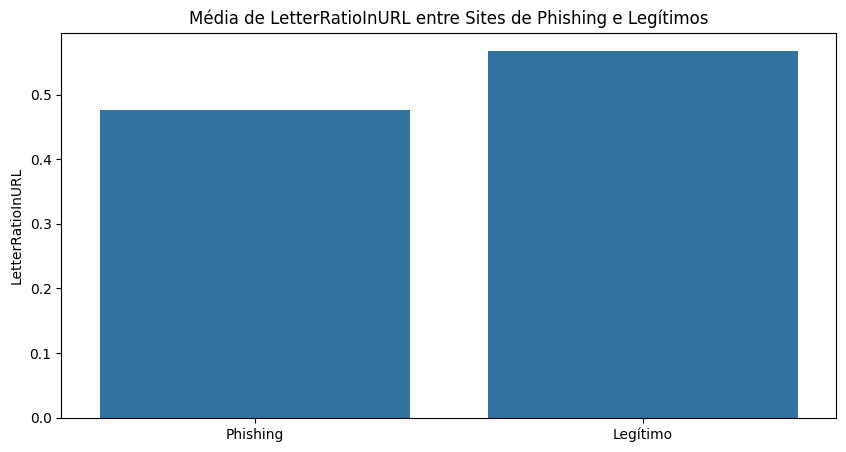

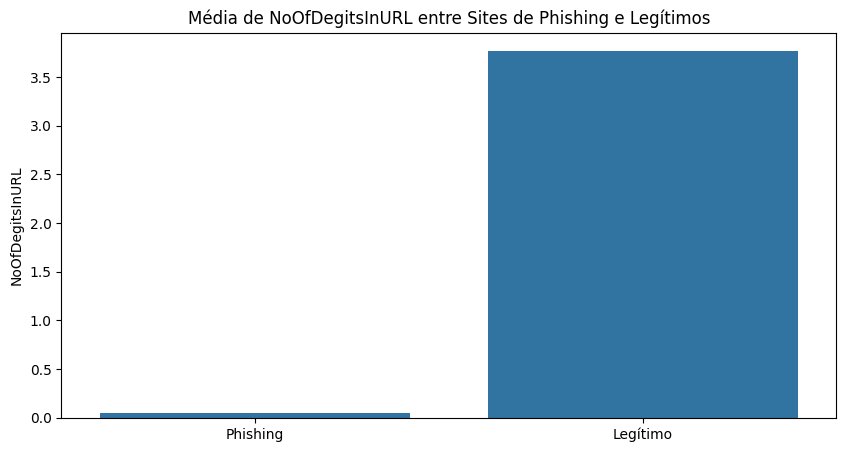

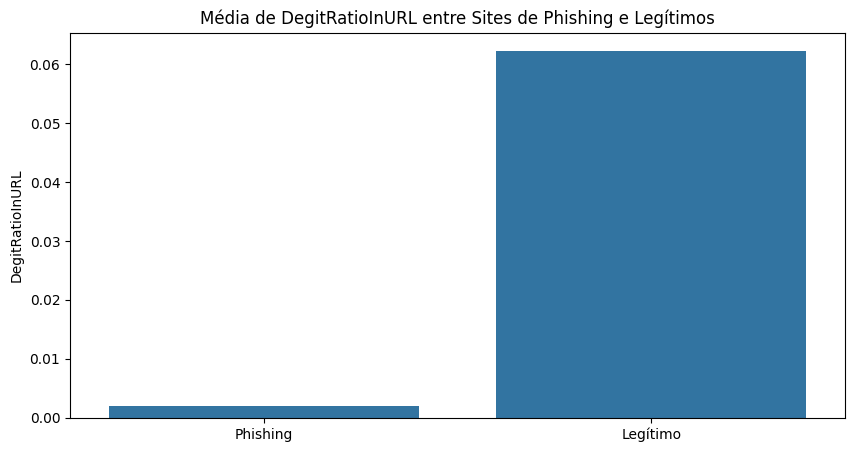

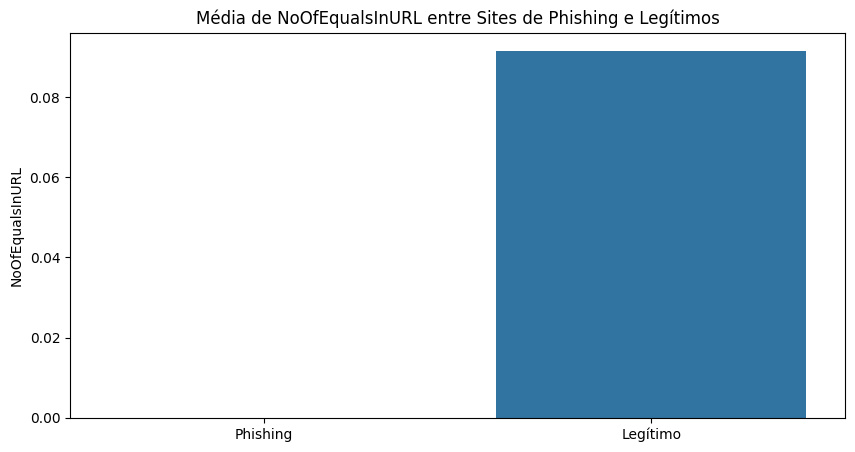

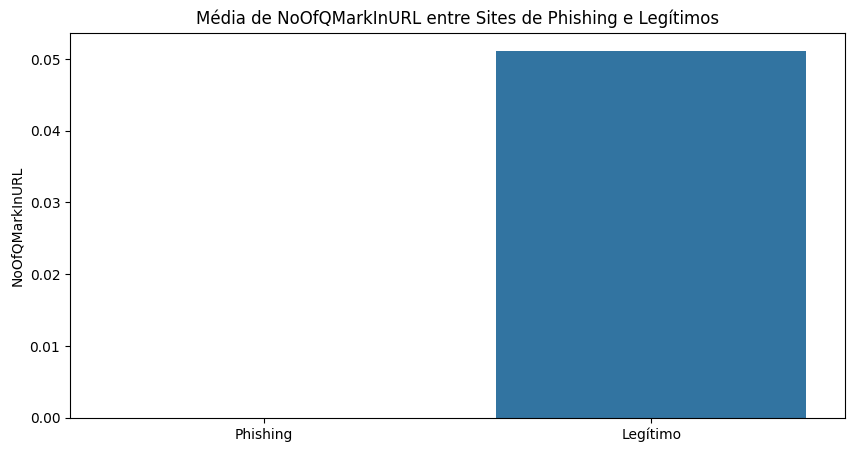

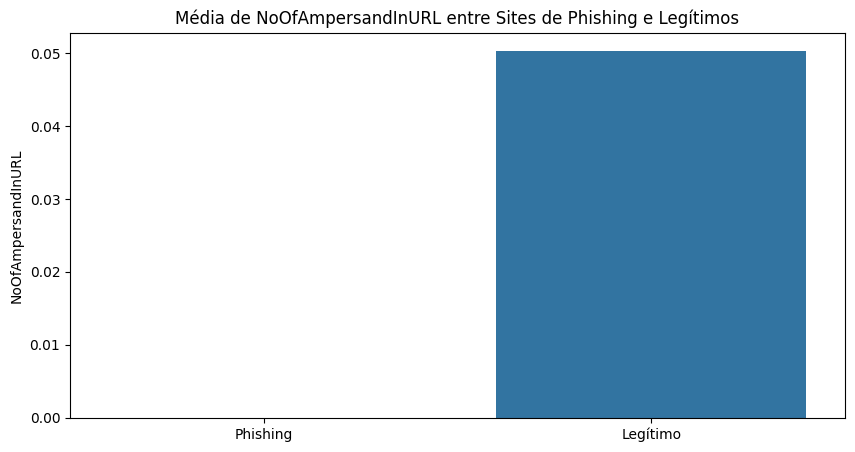

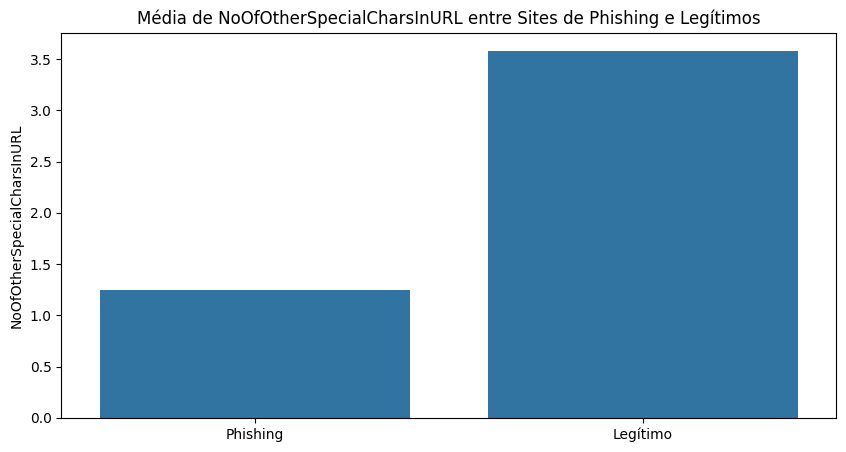

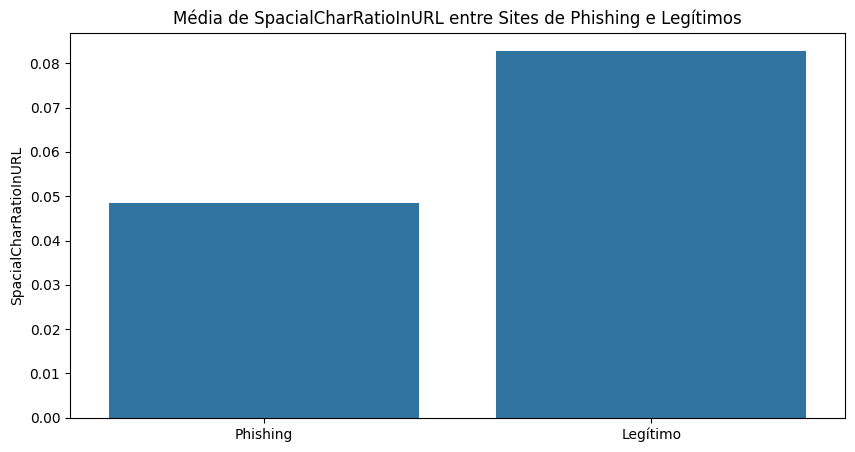

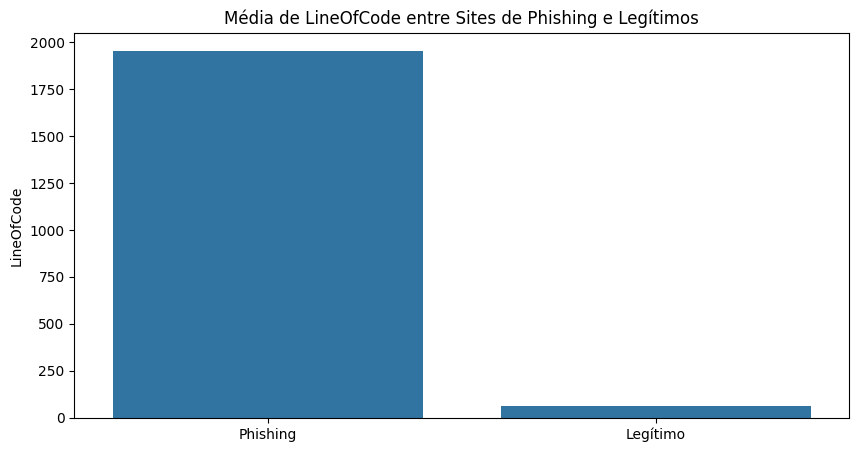

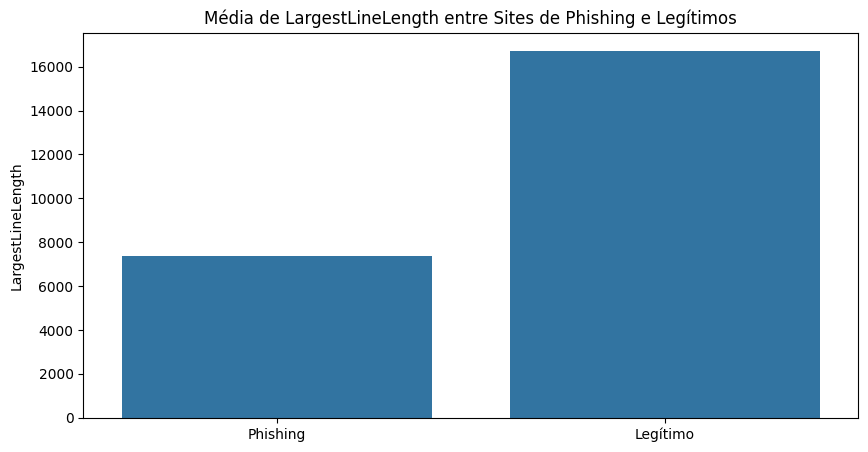

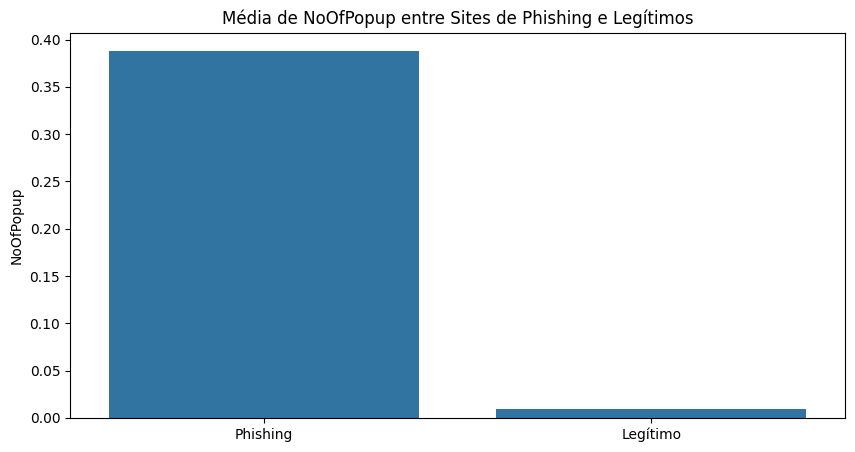

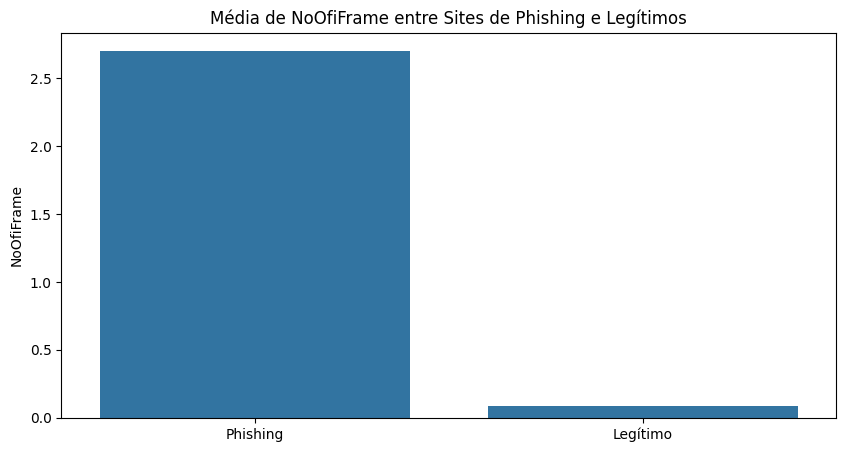

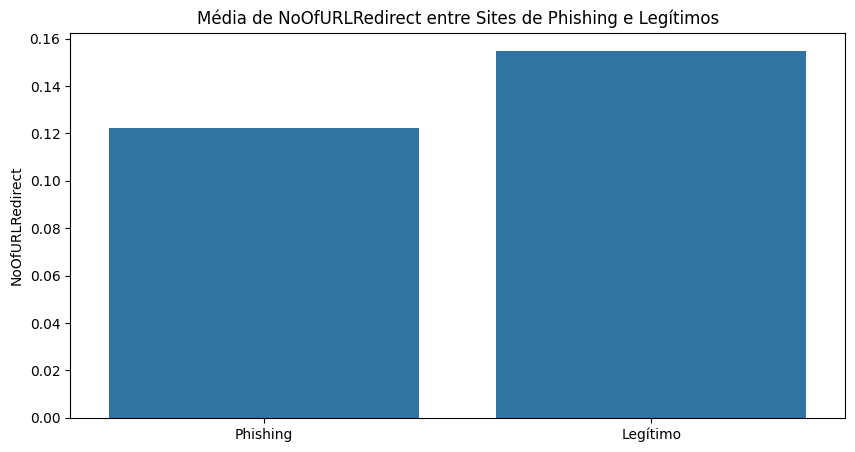

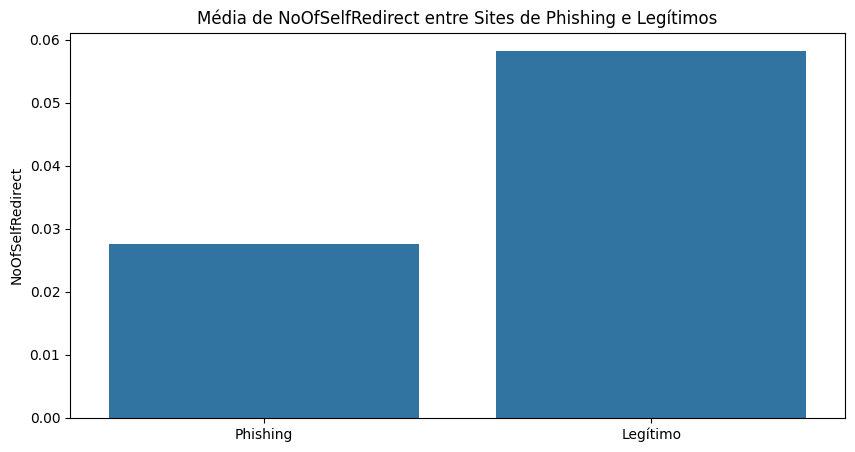

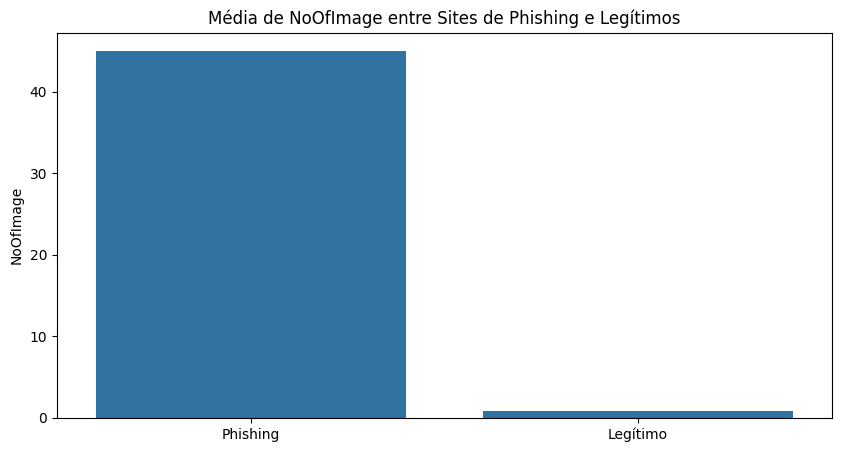

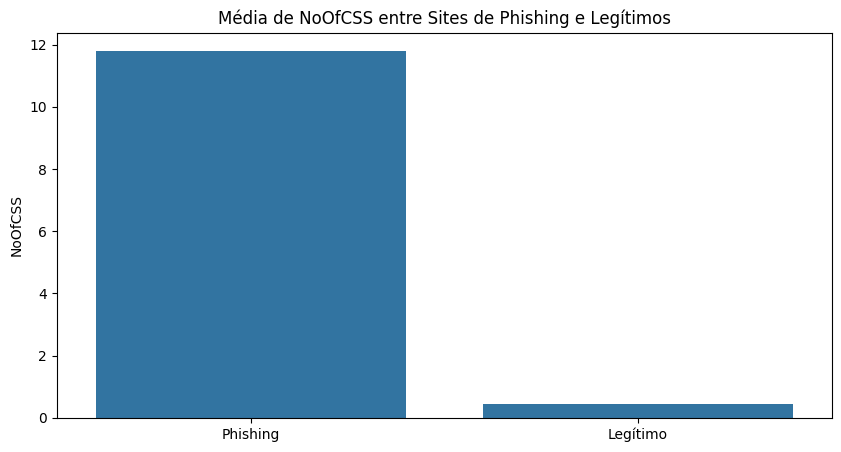

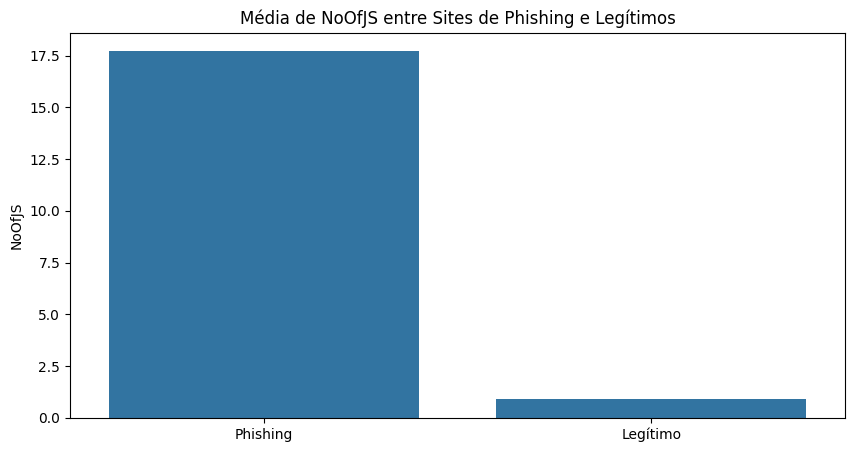

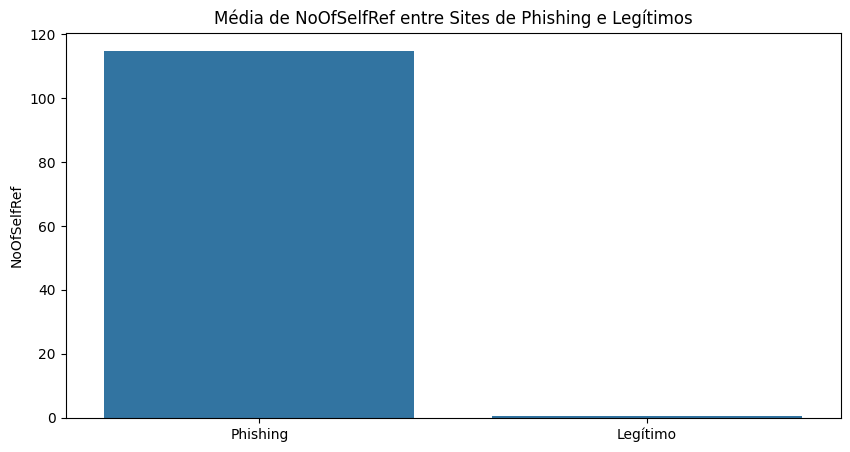

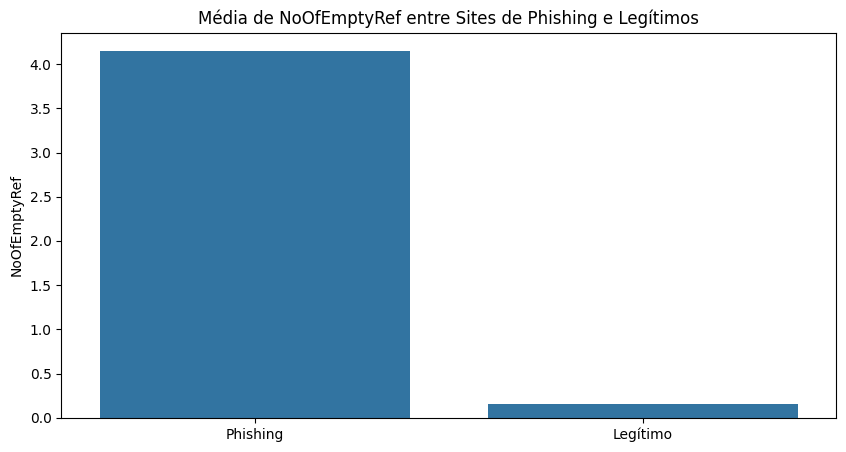

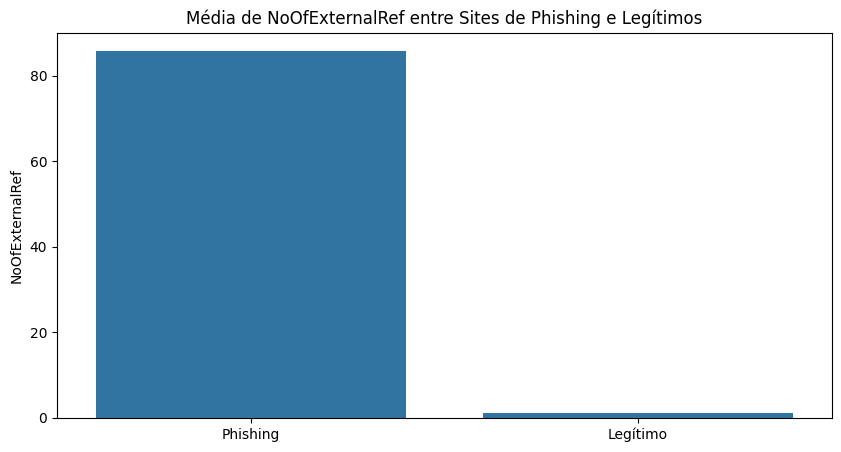

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar os dados para os gráficos de barras
comparison_df = pd.DataFrame({
    'Characteristic': numeric_columns,
    'Phishing': phishing_means.values,
    'Legítimo': legitimate_means.values
})

# Plotar gráficos de barras para cada característica
for index, row in comparison_df.iterrows():
    characteristic = row['Characteristic']
    phishing_value = row['Phishing']
    legitimate_value = row['Legítimo']
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=['Phishing', 'Legítimo'], y=[phishing_value, legitimate_value])
    plt.title(f'Média de {characteristic} entre Sites de Phishing e Legítimos')
    plt.ylabel(characteristic)
    plt.show()




# Matriz de correlação

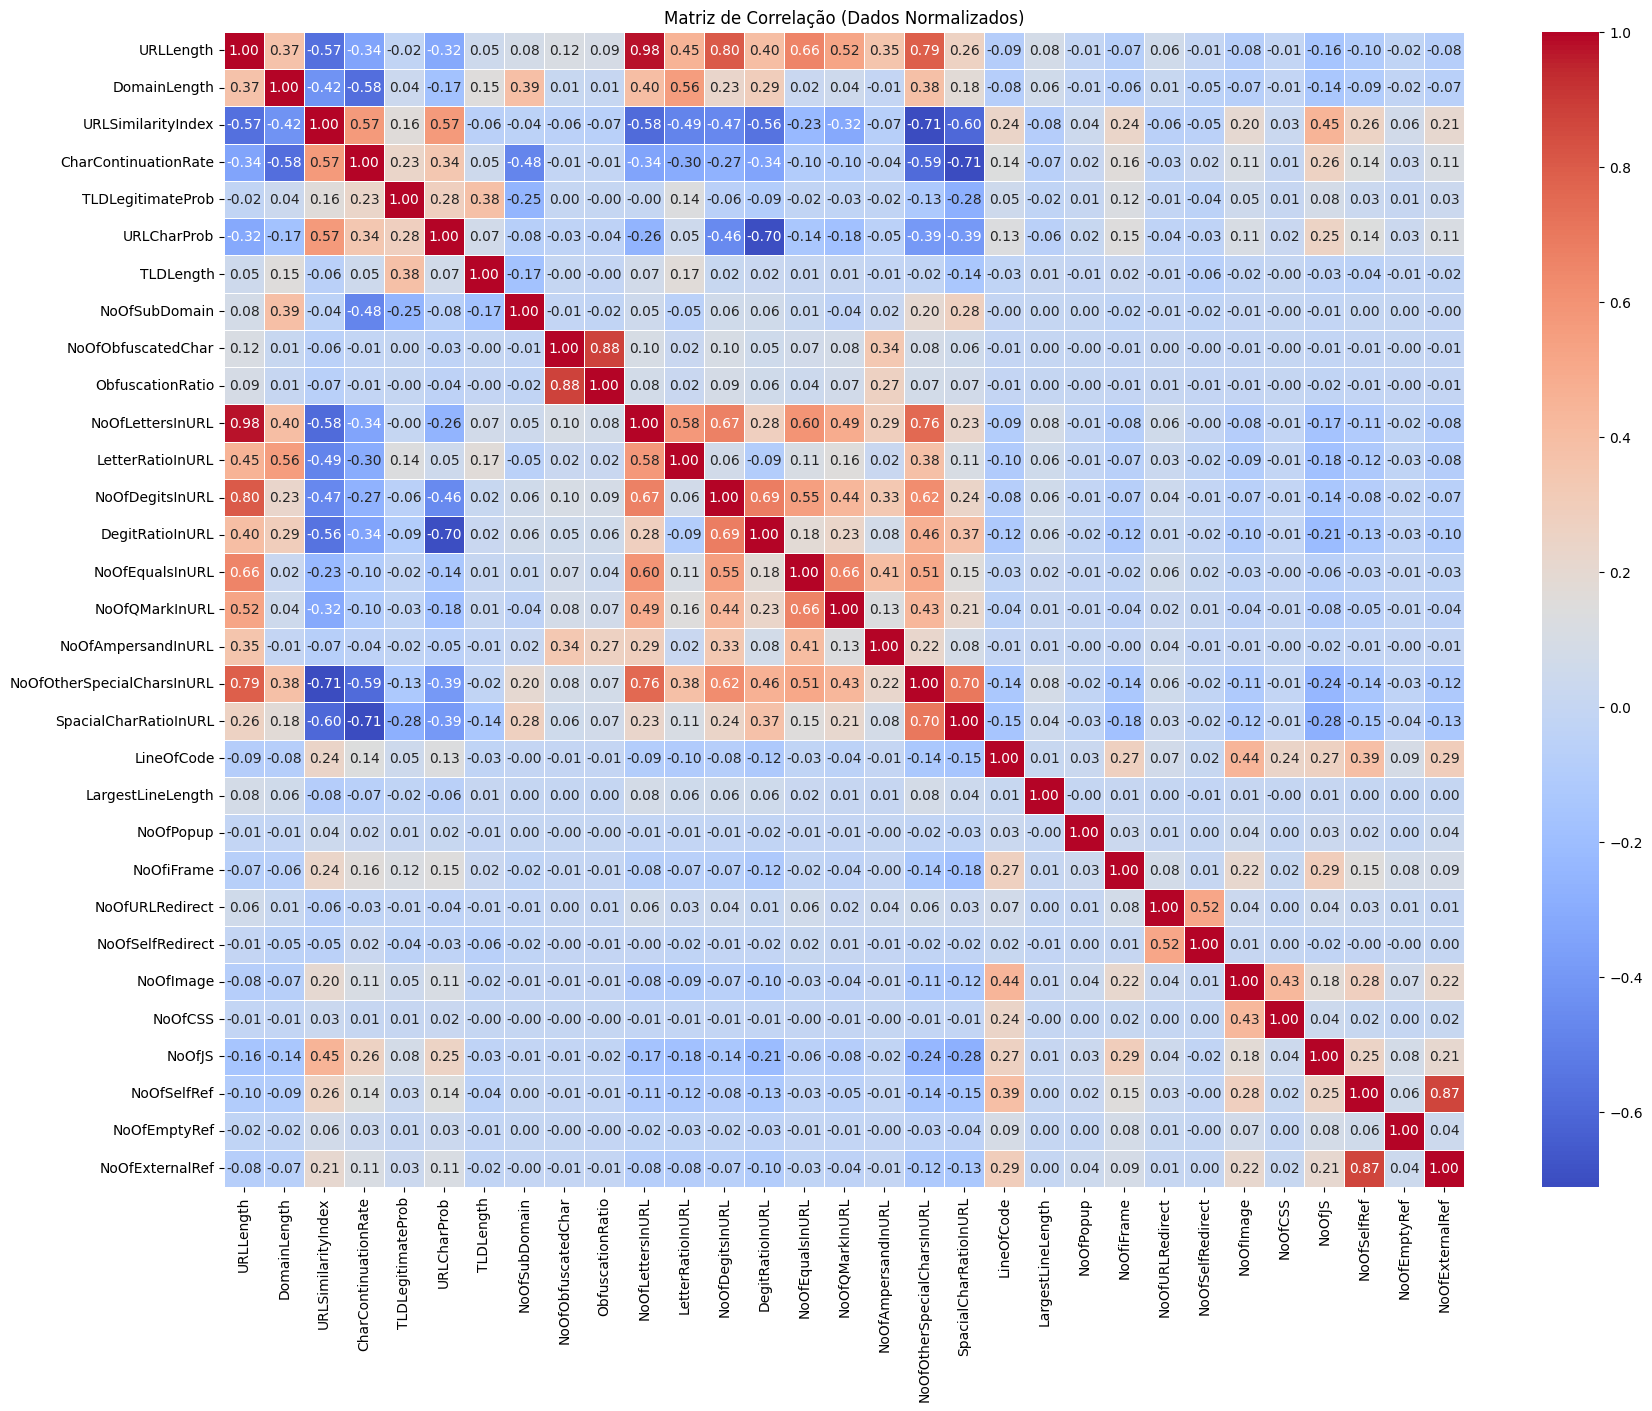

In [87]:

from sklearn.preprocessing import StandardScaler

# Lista de colunas numéricas que podem ser relevantes para análise de phishing
numeric_columns = [
    'URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 
    'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 
    'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 
    'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 
    'LineOfCode', 'LargestLineLength', 'NoOfPopup', 'NoOfiFrame', 'NoOfURLRedirect', 
    'NoOfSelfRedirect', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 
    'NoOfEmptyRef', 'NoOfExternalRef'
]

# Filtrar o DataFrame para incluir apenas as colunas numéricas
numeric_df = df[numeric_columns]

# Normalizar os dados
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_df)

# Converter os dados normalizados de volta para um DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

# Calcular a matriz de correlação
correlation_matrix = normalized_df.corr()

# Plotar a matriz de correlação como um mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação (Dados Normalizados)')
plt.show()